In [1]:
import os
import cv2 as cv
import SimpleITK as sitk
import random
import matplotlib.pyplot as plt
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
import pandas as pd
import tensorflow as tf
import csv
import imutils

In [2]:
if not os.path.exists('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented'):
    
    try:
        
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_0')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_1')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_2')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_3')
        os.mkdir('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_4')
        
    except OSError:
        
        print('Creation of directory failed')
        
    else:
        
        print('Successfully created directory')
        
else:
    
    print('Directory already exists')

Directory already exists


In [3]:
image_size = 1024

In [4]:
def create_csv(name,image_path):
    
    data=[]
    
    with open(f'{name}.csv', 'w', newline='') as writeFile:
        writer = csv.writer(writeFile)
        for filename in os.listdir(image_path):
            data.append(filename)
            writer.writerow(data)
            data=[]
    writeFile.close()

In [5]:
name0 = 'Level_0'
path0 = 'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_0/'
create_csv(name=name0,image_path=path0)

name1 = 'Level_1'
path1 = 'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_1/'
create_csv(name=name1,image_path=path1)

name2 = 'Level_2'
path2 = 'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_2/'
create_csv(name=name2,image_path=path2)

name3 = 'Level_3'
path3 = 'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_3/'
create_csv(name=name3,image_path=path3)

name4 = 'Level_4'
path4 = 'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_4/'
create_csv(name=name4,image_path=path4)

In [6]:
df_level0 = pd.read_csv('Level_0.csv',delimiter = '.',names=['image','type'])
df_level1 = pd.read_csv('Level_1.csv',delimiter = '.',names=['image','type'])
df_level2 = pd.read_csv('Level_2.csv',delimiter = '.',names=['image','type'])
df_level3 = pd.read_csv('Level_3.csv',delimiter = '.',names=['image','type'])
df_level4 = pd.read_csv('Level_4.csv',delimiter = '.',names=['image','type'])

df_level0.head()

,image,type
0,002c21358ce6_Train_Level_0,png
1,005b95c28852_Train_Level_0,png
2,0097f532ac9f_Train_Level_0,png
3,00cc2b75cddd_Train_Level_0,png
4,00f6c1be5a33_Train_Level_0,png


In [7]:
def rotate(image):
    
    angle = random.randint(0,360)
    rotated = imutils.rotate(image,angle)
    return rotated

def flip (image):
    
    flipped = np.fliplr(image)
    return flipped

def flip2 (image):
    
    flipped = tf.image.random_flip_up_down(image)
    return flipped

def gamma (image):
    
    value = random.uniform(0.5,1.5)
    gamma = tf.image.adjust_gamma(image, value)
    return gamma

def translation (image):
    
    x= random.randint(-100,100)
    y = random.randint(-100,100)
    rows,cols,z = image.shape
    M = np.float32([[1,0,x],[0,1,y]])
    translate = cv.warpAffine(image,M,(cols,rows))
    return translate

def crop (image):
    
    crop = tf.image.central_crop(image,0.9)
    return crop

def saturate (image):
    
    saturated = tf.image.random_saturation(image,2,6)
    return saturated

def brightness (image):

    brightness = tf.image.random_brightness(image,0.4)
    return brightness

def contrast (image):
    
    contrast = tf.image.random_contrast(image,0.8,2)
    return contrast

def hue (image):
    
    hue = tf.image.random_hue(image,0.5)
    return hue

In [8]:
def apply_aug (image):
    
    number = random.randint(1,20)
    
    if number == 1:
        image= rotate(image)
            
    if number == 2:
        image= flip(image)
        
    if number == 3:
        image= flip2(image)
        
    if number == 4:
        image= gamma(image)
                
    if number == 5:
        image= translation(image)
        
    if number == 6:
        image = crop(image)
        
    if number == 7:
        image = saturate(image)
        
    if number == 8:
        image = brightness (image)
        
    if number == 9:
        image = contrast (image)
        
    if number == 10:
        image = hue(image)
        
    if number == 11:
        i = translation(image)
        image = rotate(i)
    
    if number == 12:
        i = crop(image)
        image = contrast(i)
        
    if number == 13:
        i = rotate(image)
        image = crop(i)
        
    if number == 14:
        i = translation(image)
        image = gamma(i)
        
    if number == 15:
        i = translation(image)
        image = flip(i)
        
    if number == 16:
        i = translation(image)
        image = flip2(i)
        
    if number == 17:
        i = flip(image)
        image = flip2(i)
        
    if number == 18:
        i = rotate(image)
        image = saturate(i)
        
    if number == 19:
        i = rotate(image)
        image = flip(i)
        
    if number == 20:
        i = rotate(image)
        image = flip2(i)
    
    return image

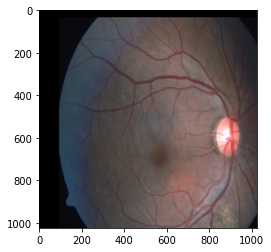

In [9]:
img1 = sitk.ReadImage('H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Train/Level_0/0a85a1e8f9e9_Train_Level_0.png')
img1 = sitk.GetArrayFromImage(img1)
image1 = apply_aug(img1)
plt.imshow(image1)

In [10]:
print(df_level0.count())
print(df_level1.count())
print(df_level2.count())
print(df_level3.count())
print(df_level4.count())

image    1507
type     1507
dtype: int64
image    328
type     328
dtype: int64
image    854
type     854
dtype: int64
image    165
type     165
dtype: int64
image    246
type     246
dtype: int64


In [11]:
create = 3000

print (create-1507)
print (create-328)
print (create-854)
print (create-165)
print (create-246)

1493
2672
2146
2835
2754


In [12]:
def oversample_images(iterations,level,df,path,image_size):
    
    a = 1
    p = 1
    for a in range(iterations):
        
        for i, item in df.iterrows():
        
            img = sitk.ReadImage(path + item[0] + '.png')
            img = sitk.GetArrayFromImage(img)
            img = apply_aug(img)
            
            io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
            p +=1

In [13]:
oversample_images(iterations=1,level=0,df=df_level0,path = path0, image_size = 1024)

In [14]:
oversample_images(iterations=8,level=1,df=df_level1,path = path1, image_size = 1024)

<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_1/6d292ca4c9ad_Train_Level_1_175.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_1/278aa860dffd_Train_Level_1_386.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_1/8714d17bb6da_Train_Level_1_537.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datas

In [15]:
oversample_images(iterations=3,level=2,df=df_level2,path = path2, image_size = 1024)

<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_2/66bae1ba227f_Train_Level_2_426.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_2/b06dabab4f09_Train_Level_2_713.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_2/b6304c545f95_Train_Level_2_733.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datas

In [16]:
oversample_images(iterations=17,level=3,df=df_level3,path = path3, image_size = 1024)

<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_3/bec0acd539b2_Train_Level_3_148.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_3/8c0d05233238_Train_Level_3_932.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_3/405b4f78658f_Train_Level_3_1039.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle data

In [17]:
oversample_images(iterations=11,level=4,df=df_level4,path = path4, image_size = 1024)

<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_4/44ecf3f4efa5_Train_Level_4_324.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_4/26463a5fb949_Train_Level_4_786.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_4/312694ea8e6a_Train_Level_4_1288.png is a low contrast image
  io.imsave(f'H:/Kaggle datasets/Thesis_Diabetic/Diabetic_Retinopathy/Augmented/Train/Level_{level}/{item[0]}_{p}.png',img)
<ipython-input-12-7595a1c0a051>:13: UserWarning: H:/Kaggle data